In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn import  linear_model
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import weibull_min, lognorm, logistic, norm
from scipy.optimize import curve_fit
from scipy.special import erf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse


# San_Diego_Region_SB743_VMT_Maps

In [7]:
df = pd.read_csv('San_Diego_Region_SB743_VMT_Maps.csv')
df.head()

,OBJECTID,series,scenario_id,city,geo_id,name,persons,vmt,vmt_per_capita,PctMean,pctmean_txt,vmt_type,map_layer,geo,Shape__Area,Shape__Length
0,1,Series 13,720,95.02,9502,95.02,3668,67342.21007,18.359381,1.043147,104.3%,Residents,2012 VMT per Capita by Census Tract,Census Tract,4.837013e+06,9160.417303
1,2,Series 13,720,95.04,9504,95.04,6226,141773.15510,22.771146,1.293815,129.4%,Residents,2012 VMT per Capita by Census Tract,Census Tract,8.326460e+07,56527.434241
2,3,Series 13,720,95.05,9505,95.05,6609,143731.36900,21.747824,1.235672,123.6%,Residents,2012 VMT per Capita by Census Tract,Census Tract,2.507101e+07,23423.135414
3,4,Series 13,720,95.06,9506,95.06,4291,77724.49796,18.113376,1.029169,102.9%,Residents,2012 VMT per Capita by Census Tract,Census Tract,2.164130e+06,7590.512449
4,5,Series 13,720,95.07,9507,95.07,3397,80276.33190,23.631537,1.342701,134.3%,Residents,2012 VMT per Capita by Census Tract,Census Tract,5.776957e+06,10464.821185


In [8]:
df.shape

(2714, 16)

### Descriptive Statistics

In [9]:
df.describe()

,OBJECTID,scenario_id,geo_id,persons,vmt,vmt_per_capita,PctMean,Shape__Area,Shape__Length
count,2714.00000,2714.000000,2714.000000,2714.000000,2.714000e+03,2714.000000,2714.000000,2.714000e+03,2714.000000
mean,1357.50000,566.145910,12902.881356,5235.827561,1.108156e+05,21.670501,0.968782,3.481259e+07,17574.616903
std,783.60864,142.613754,11312.197561,11323.247640,2.421520e+05,7.873077,0.332112,2.237260e+08,33170.516906
min,1.00000,434.000000,100.000000,0.000000,0.000000e+00,0.000000,0.000000,4.757186e+04,1322.264424
25%,679.25000,434.000000,7701.000000,977.000000,2.353875e+04,17.016428,0.791637,1.694728e+06,6152.975277
50%,1357.50000,434.000000,13203.000000,3321.500000,5.950892e+04,20.670000,0.914254,3.113880e+06,8652.332014
75%,2035.75000,720.000000,17501.000000,5458.250000,1.005271e+05,24.790000,1.081201,7.066563e+06,14206.843935
max,2714.00000,720.000000,99900.000000,266259.000000,4.435828e+06,80.760000,4.155396,3.942634e+09,378494.180340


### Cleaning the Data

1) outliers 2) Missing Data 3) Malicious Data 4) Erroneous Data 5) Irrelevant Data 6) Inconsistent Data 7) Formatting

In [10]:
print(df.dtypes)
print(df.isnull().sum())
print('duplicated : ',df.duplicated().sum())

OBJECTID            int64
series             object
scenario_id         int64
city               object
geo_id              int64
name               object
persons             int64
vmt               float64
vmt_per_capita    float64
PctMean           float64
pctmean_txt        object
vmt_type           object
map_layer          object
geo                object
Shape__Area       float64
Shape__Length     float64
dtype: object
OBJECTID          0
series            0
scenario_id       0
city              0
geo_id            0
name              0
persons           0
vmt               0
vmt_per_capita    0
PctMean           0
pctmean_txt       0
vmt_type          0
map_layer         0
geo               0
Shape__Area       0
Shape__Length     0
dtype: int64
duplicated :  0


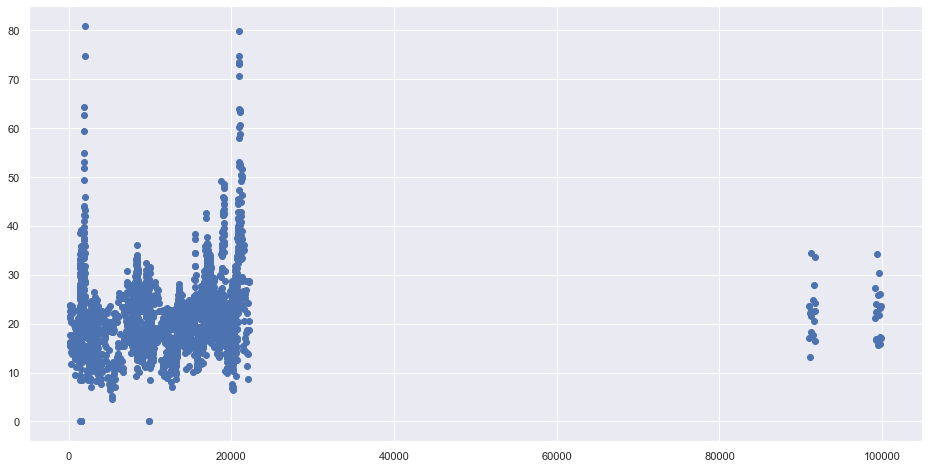

In [11]:
#Scatter plot shows all the data more likely to same distrbibution and no outliers but we can remove points where vmt_per_capita = 0.
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['geo_id'],df['vmt_per_capita'])

In [12]:
df = df[df['vmt_per_capita']>0]

In [13]:
#10 rows are removed.
df.shape

(2704, 16)

### Data Exploration

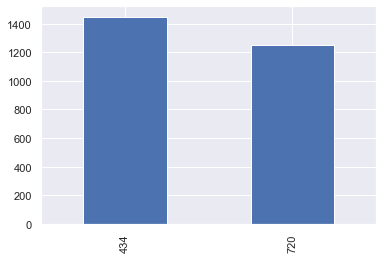

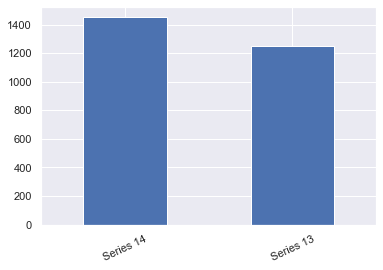

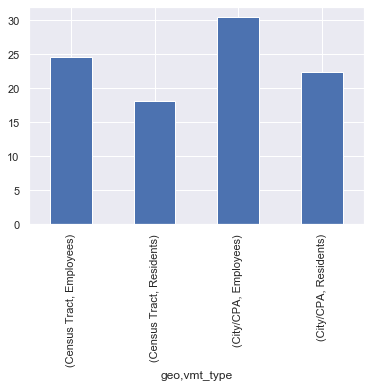

In [14]:
fig1 = plt.figure(1)
scenario_id = df['scenario_id'].value_counts()
scenario_id.plot(kind='bar')

fig2 = plt.figure(2)
series_count = df['series'].value_counts()
series_count.plot(kind='bar')
plt.xticks(rotation=25)

fig3 = plt.figure(3)
fig3 = df.groupby(['geo','vmt_type'])['vmt_per_capita'].mean().plot(kind='bar')

plt.show()

# COVID_19_Statistics_San_Diego_County

In [15]:
df = pd.read_csv('COVID_19_Statistics_San_Diego_County.csv')
df.head()

,X,Y,objectid,date,tests,positives,hospitalized,icu,deaths,newcases,...,age80_plus,ageunknow,age20_29,genderfemale,gendermale,gendeunk,age30_39,globalid,newtests,rolling_perc_pos_cases
0,-1.299488e+07,3.899796e+06,59,2020/03/11 08:00:00+00,123.0,5,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{78698F35-A6E9-48CB-8C8D-67A70EC15C1D},NaN,NaN
1,-1.299488e+07,3.899796e+06,60,2020/03/12 08:00:00+00,147.0,10,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{EFA2B0DB-A692-4632-8495-14B46E240096},NaN,NaN
2,-1.299488e+07,3.899796e+06,61,2020/03/13 08:00:00+00,273.0,19,NaN,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{AA7DF18A-6303-4758-A5F1-9B9CD4388A92},52.0,NaN
3,-1.299488e+07,3.899796e+06,62,2020/03/14 08:00:00+00,288.0,25,12.0,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{9A014068-714D-4FD4-B011-A16A1A49C07C},14.0,NaN
4,-1.299488e+07,3.899796e+06,63,2020/03/15 08:00:00+00,313.0,37,10.0,NaN,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{DA54D0B2-3C90-4FF2-8090-BE3BDB8C1B4E},25.0,NaN


### Cleaning the Data

In [16]:
df = df[['date','tests','positives','hospitalized','icu','deaths']].sort_values('date')
df['date'] = pd.to_datetime(df.date)

df.columns = ['date', 'tests', 'cases', 'hosp','icu', 'deaths']
df['date'] = pd.to_datetime(df.date)
start_date = df.iloc[0].date
start_cases = df.iloc[0].cases
df['day'] = (df.date - start_date).dt.days

df['new_cases'] = df.cases.diff()
df['cases_rate'] = df.cases.diff()/ df.cases.shift(1)
df['cases_smooth'] = lowess(df.cases, df.day)[:,1]
df['cases_smooth_rate'] = df.cases_smooth.diff()/df.cases_smooth.shift(1)

df['new_hosp'] = df.hosp.diff()
df['hosp_rate'] = df.hosp.diff()/ df.hosp.shift(1)
df['hosp_smooth'] = lowess(df.hosp.fillna(0), df.day)[:,1]
df['hosp_smooth_rate'] = df.hosp.diff()/df.hosp_smooth.shift(1)

df['new_deaths'] = df.deaths.diff()
df['deaths_rate'] = df.deaths.diff()/ df.deaths.shift(1)
df['deaths_smooth'] = lowess(df.deaths.fillna(0), df.day)[:,1]
df['deaths_smooth_rate'] = df.deaths_smooth.diff()/df.deaths_smooth.shift(1)

#df['double_days'] = np.log(2)/np.log(1+df.cases_smooth_rate)


df.tail()

,date,tests,cases,hosp,icu,deaths,day,new_cases,cases_rate,cases_smooth,cases_smooth_rate,new_hosp,hosp_rate,hosp_smooth,hosp_smooth_rate,new_deaths,deaths_rate,deaths_smooth,deaths_smooth_rate
169,2020-08-23 08:00:00+00:00,784836.0,36727,2989.0,733.0,660.0,169,187.0,0.005118,37148.127663,0.009829,11.0,0.003694,3004.591718,0.003687,0.0,0.000000,664.149246,0.007631
170,2020-08-24 08:00:00+00:00,790370.0,36994,3006.0,736.0,665.0,170,267.0,0.007270,37509.879529,0.009738,17.0,0.005688,3026.083747,0.005658,5.0,0.007576,669.180804,0.007576
171,2020-08-25 08:00:00+00:00,798697.0,37222,3022.0,738.0,668.0,171,228.0,0.006163,37871.784955,0.009648,16.0,0.005323,3047.584905,0.005287,3.0,0.004511,674.214090,0.007522
172,2020-08-26 08:00:00+00:00,803932.0,37499,3040.0,738.0,673.0,172,277.0,0.007442,38233.831303,0.009560,18.0,0.005956,3069.094654,0.005906,5.0,0.007485,679.248982,0.007468
173,2020-08-27 08:00:00+00:00,812753.0,37784,3065.0,146.0,676.0,173,285.0,0.007600,38596.007148,0.009473,25.0,0.008224,3090.612505,0.008146,3.0,0.004458,684.285368,0.007415


In [17]:
df.set_index('date').cases_rate.tail(15)


date
2020-08-13 08:00:00+00:00    0.012062
2020-08-14 08:00:00+00:00    0.008190
2020-08-15 08:00:00+00:00    0.009725
2020-08-16 08:00:00+00:00    0.008132
2020-08-17 08:00:00+00:00    0.005778
2020-08-18 08:00:00+00:00    0.006086
2020-08-19 08:00:00+00:00    0.006558
2020-08-20 08:00:00+00:00    0.008537
2020-08-21 08:00:00+00:00    0.008103
2020-08-22 08:00:00+00:00    0.009309
2020-08-23 08:00:00+00:00    0.005118
2020-08-24 08:00:00+00:00    0.007270
2020-08-25 08:00:00+00:00    0.006163
2020-08-26 08:00:00+00:00    0.007442
2020-08-27 08:00:00+00:00    0.007600
Name: cases_rate, dtype: float64

### Data Exploration

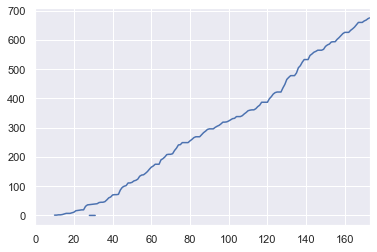

In [18]:
df['deaths'].plot()

In [19]:
def func_norm(x, loc, scale, a):
    return a*norm.pdf(x,loc, scale)
func_norm.popt =  (22, 10, 3659)

def func_logpdf(x, loc, scale, a):
    return a*logistic.pdf(x,loc, scale)
func_logpdf.popt =  (22, 10, 3659)

def func_logistic(x, loc, scale, a): # popt = (14,4, 800)
    return a*logistic.cdf(x, loc, scale)
func_logistic.popt =  (14,4, 800)


def func_erf(x, loc, scale, a, b):
    return a*erf( (x-loc) / scale ) + b
func_erf.popt = (50,20,3000,3000)

def func_gomp(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))
func_gomp.popt = (1000,10,.1)

[1.36295349e+05 6.54360114e+00 9.70159001e-03]


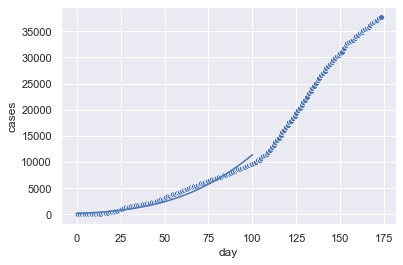

In [20]:
t = df.copy() 


popt, pcov = curve_fit(func_gomp, t.day, t.cases, absolute_sigma = True)
print(popt)

sns.scatterplot(x=t.day, y=t.cases)

x=np.linspace(0,100)


sns.lineplot(x=x, y=func_gomp(x, *popt))


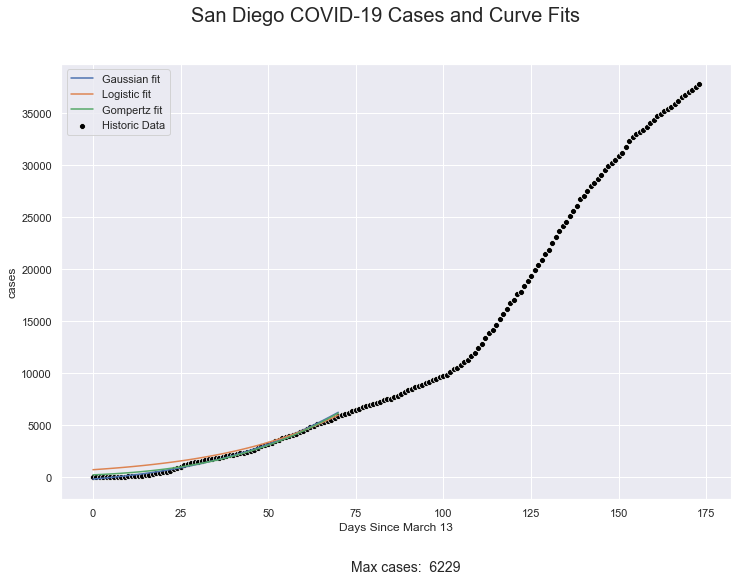

In [21]:
def ln_fit(df, fig, ax, col_name, use_smooth=True, pred_days = 70, text=True, fit_func = func_erf, label='', normalize=False):

    fit_col = col_name+'_smooth' if use_smooth else col_name
    
    t = df.dropna(subset=['day',fit_col])
    
    popt, pcov = curve_fit(fit_func, t.day, t[fit_col], p0=fit_func.popt, absolute_sigma = True)
   
    x=np.linspace(0,pred_days)
    proj = fit_func(x, *popt)
    
    sns.lineplot(x=x, y=proj/(proj.max() if normalize else 1), ax=ax, label=label)
    
    perr = np.sqrt(np.diag(pcov))
    
    max_cases = np.max(proj)
    
    if text: 
        plt.gcf().text(.46,-0,f"Max {col_name}: {max_cases:5.0f}", fontsize=14) 
    
    return popt, perr, x, proj

fig, ax = plt.subplots(figsize=(12,8))

t = df.copy()
#t.cases = lowess(df.cases, df.day, is_sorted=True, frac=0.4, it=0)[:,1]

popt, perr, x, cases_d_e = ln_fit(t[:], fig, ax, 'cases', fit_func = func_erf, label="Gaussian fit")
##print(f"Mean={round(popt[0])}, R^2={r2_score(t.cases, cases_d_e[:len(t.cases)])}")

popt, perr, x, cases_d_l = ln_fit(t[:], fig, ax, 'cases', text=False, fit_func = func_logistic, label='Logistic fit')
#print(f"Mean={round(popt[0])}, R^2={r2_score(t.cases, cases_d_l[:len(t.cases)])}")

popt, perr, x, cases_d_l = ln_fit(t[:], fig, ax, 'cases', text=False, fit_func = func_gomp, label='Gompertz fit')
#print(f"Mean={round(popt[0])}, R^2={r2_score(t.cases, cases_d_l[:len(t.cases)])}")
    
sns.scatterplot(x='day', y='cases', data=t, ax=ax, color='black', label='Historic Data')

    
    
    
ax.set_xlabel("Days Since March 13")   
fig.suptitle("San Diego COVID-19 Cases and Curve Fits", fontsize=20);


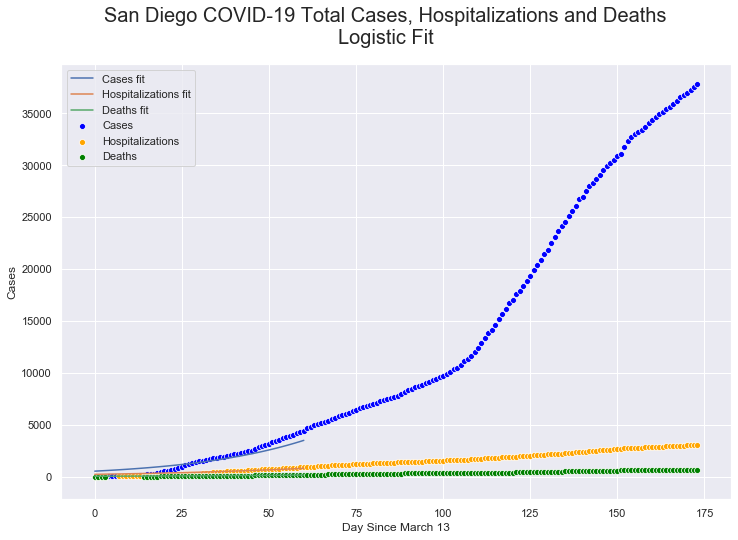

In [22]:
def tc_plot(ax, fit_func):

    t = df.dropna(subset=['day','cases','hosp', 'deaths']).copy()

    x = np.linspace(0,60)

    popt, pcov = curve_fit(fit_func, t.day, t.cases, p0=fit_func.popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Cases fit')
    sns.scatterplot(df.day, df.cases, ax=ax, color='blue', label='Cases')    
    #print(f"C Mean={round(popt[0])}, R^2={r2_score(df.cases, fitted[:len(df.cases)])}")

    popt, pcov = curve_fit(fit_func, t.day, t.hosp,popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Hospitalizations fit')
    sns.scatterplot(df.day, df.hosp,  ax=ax, color='orange', label='Hospitalizations')
    #print(f"H Mean={round(popt[0])}, R^2={r2_score(df.hosp.fillna(0), fitted[:len(df.hosp)])}")

    popt, pcov = curve_fit(fit_func, t.day, t.deaths,popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Deaths fit')
    #sns.lineplot(x=df.day, y=df.deaths_smooth, ax=ax, label='Deaths')   
    sns.scatterplot(t.day, t.deaths+1, ax=ax, color='green', label='Deaths')
    #print(f"D Mean={round(popt[0])}, R^2={r2_score(df.deaths.fillna(0), fitted[:len(df.deaths)])}")

    
fig, ax = plt.subplots(figsize=(12,8))   
tc_plot(ax, func_logistic)
ax.set_ylabel('Cases')
ax.set_xlabel('Day Since March 13')
fig.suptitle("San Diego COVID-19 Total Cases, Hospitalizations and Deaths\nLogistic Fit", fontsize=20);

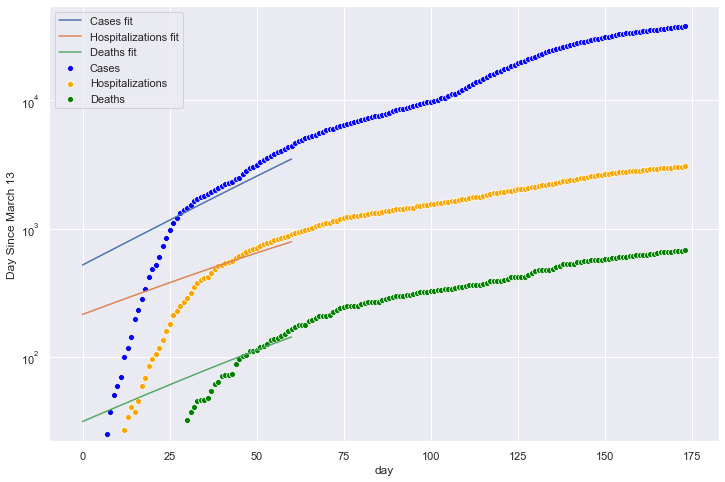

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

tc_plot(ax, func_logistic)

plt.yscale('log')

ax.set_ylabel('Cases')
ax.set_ylabel('Day Since March 13');

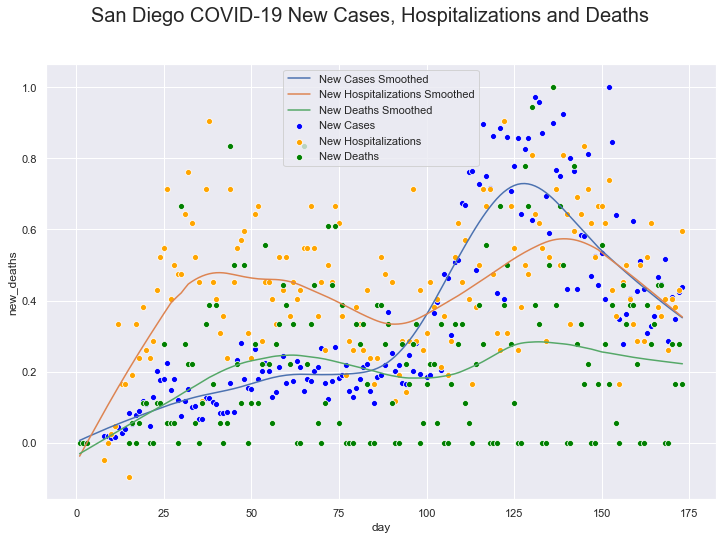

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("San Diego COVID-19 New Cases, Hospitalizations and Deaths", fontsize=20);


smoothing = 0.3

fit_func = func_logpdf 

t = df.dropna(subset=['day','new_cases','new_hosp']).copy()

t.new_hosp = t.new_hosp/np.max(t.new_hosp)
t.new_cases = t.new_cases/np.max(t.new_cases)
t.new_deaths = t.new_deaths/np.max(t.new_deaths)

x = np.linspace(0,60)

sns.scatterplot(df.day, t.new_cases, ax=ax, color='blue', label='New Cases')
smoothed = lowess(t.new_cases,  t.day,smoothing)
sns.lineplot(smoothed[:,0], smoothed[:,1], label='New Cases Smoothed')

sns.scatterplot(df.day, t.new_hosp, ax=ax, color='orange', label='New Hospitalizations')
smoothed = lowess(t.new_hosp,  t.day, smoothing)
sns.lineplot(smoothed[:,0], smoothed[:,1], label='New Hospitalizations Smoothed')


sns.scatterplot(t.day, t.new_deaths, ax=ax, color='green', label='New Deaths')
smoothed = lowess(t.new_deaths,  t.day, smoothing)
sns.lineplot(smoothed[:,0], smoothed[:,1], label='New Deaths Smoothed')

In [25]:
t = pd.Timestamp('2020-03-13', freq='D') 
t + t.freq*42

Timestamp('2020-04-24 00:00:00', freq='D')

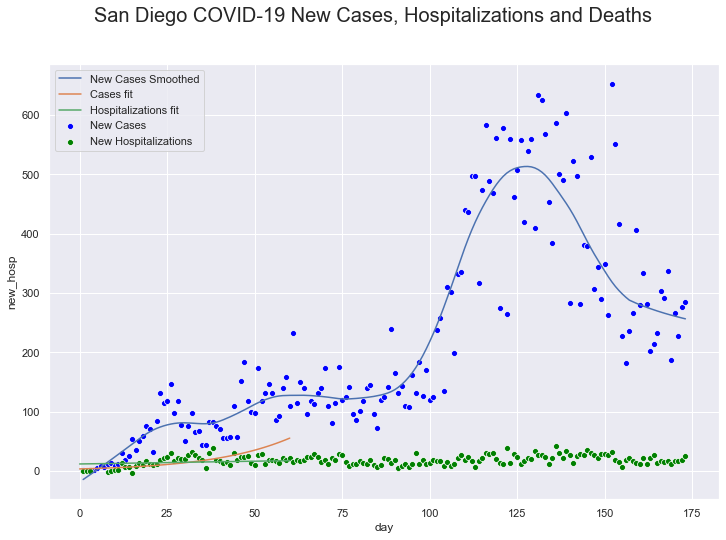

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("San Diego COVID-19 New Cases, Hospitalizations and Deaths", fontsize=20);

def nc_plot(df, pct_cases=None, cases_only=False):
    # Fit a normal PDF

    fit_func = func_logpdf or fit_func

    if pct_cases:
        df = df.iloc[:int(pct_cases*len(df))]
    
    t = df.dropna(subset=['day','new_cases','new_hosp']).copy()


    x = np.linspace(0,60)

    sns.scatterplot(df.day, df.new_cases, ax=ax, color='blue', label='New Cases')

    tdl = lowess(df.new_cases,  df.day, 0.2)
    sns.lineplot(tdl[:,0], tdl[:,1], label='New Cases Smoothed')

    popt, pcov = curve_fit(fit_func, t.day, t.new_cases, p0=fit_func.popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Cases fit')
    
    #if not cases_only:
    #    print(f"C: Mean={round(popt[0])}, R^2={r2_score(df.new_cases[1:], fitted[1:len(df.new_cases)])}")
    
    if not cases_only:
        
        sns.scatterplot(df.day, df.new_hosp,  ax=ax, color='green', label='New Hospitalizations')

        popt, pcov = curve_fit(fit_func, t.day, t.new_hosp,popt, absolute_sigma = True)
        fitted = fit_func(x, *popt)
        sns.lineplot(x, fitted, label='Hospitalizations fit')

        #print(f"H: Mean={round(popt[0])}, R^2={r2_score(df.new_hosp[1:], fitted[1:len(df.new_hosp)])}")

        #popt, pcov = curve_fit(func_norm, t.day, t.new_deaths,popt, absolute_sigma = True)
        #sns.lineplot(x, func_norm(x, *popt), label='Deaths fit')  
        #sns.scatterplot(t.day, t.new_deaths, ax=ax, color='green', label='Deaths')
        #print(round(popt[0]))

        
nc_plot(df,1, cases_only=False)


### Regression Analysis

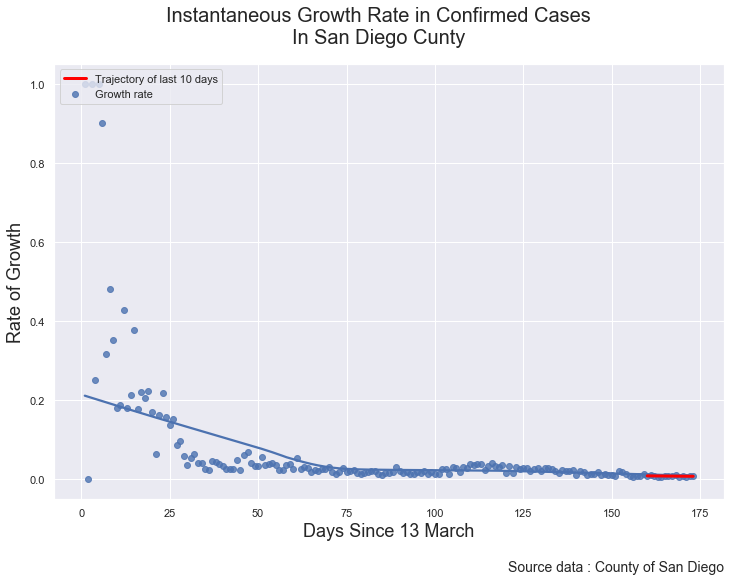

Coefficients: [[-8.15118664e-05]] [0.02100112]
Zero growth at 257.6449113787046 days
R2 = 0.06338097986161084
Mean Squared Error = 1.5955082851667786e-06
Root Mean Squared Error = [0.00126313]


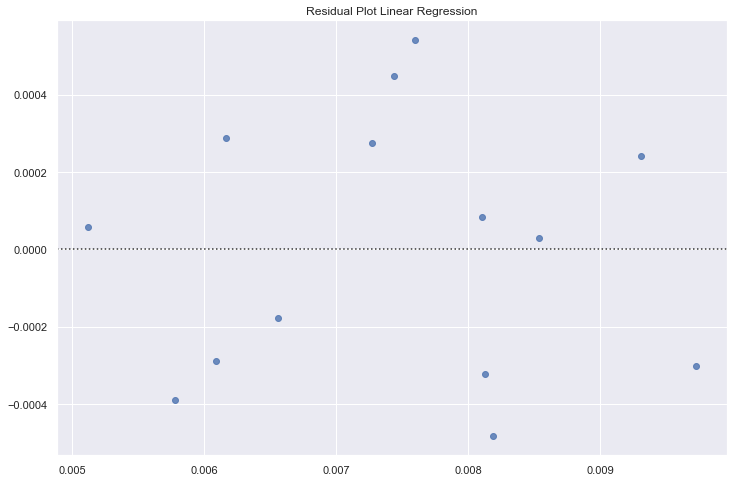

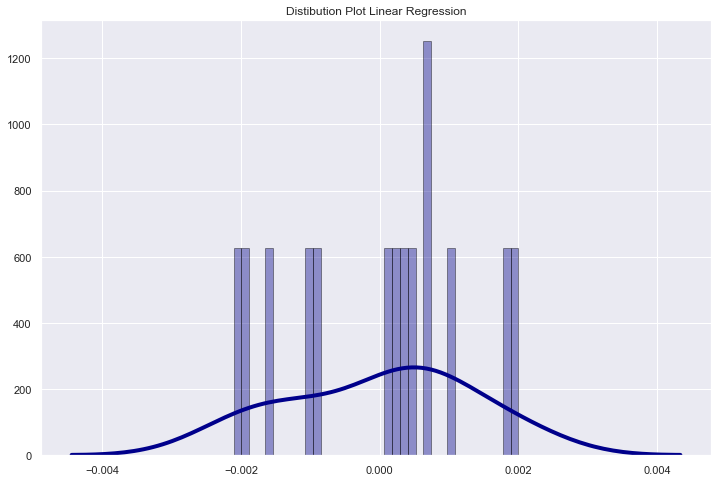

In [27]:
def plot_gr(df, col):

    x = df.day.values.reshape(len(df), 1)[-14:]
    y = df[col].values.reshape(len(df), 1)[-14:]

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    fig, ax = plt.subplots(figsize=(12,8))
    fig.suptitle('Instantaneous Growth Rate in Confirmed Cases\nIn San Diego Cunty',fontsize=20)

    sns.regplot(ax=ax, x='day',y=col, data=df, lowess=True, label = 'Growth rate')

    ax.plot(x, regr.predict(x), color='red', linewidth=3, label = 'Trajectory of last 10 days')

    ax.set_xlabel('Days Since 13 March', fontsize=18)
    ax.set_ylabel('Rate of Growth', fontsize=18)

   
    plt.gcf().text(.65,0, f"Source data : County of San Diego", fontsize=14) 
    ax.legend(loc='upper left');
    plt.show()

    print('Coefficients:', regr.coef_, regr.intercept_)

    m = regr.coef_[0][0]
    b = regr.intercept_[0]

    
    
    print(f"Zero growth at {-b/m} days")
    
    
    y_pred = regr.predict(x)
    reg_r2 = r2_score(y, y_pred) # calculate r2 score
    reg_mse = mean_squared_error(y,y_pred) # calculate mean squared error
    reg_rmse = rmse(y, y_pred) # calaute root mean squared error
    print('R2 =',reg_r2) 
    print('Mean Squared Error =',reg_mse)
    print('Root Mean Squared Error =',reg_rmse)
    
    
    residuals = y-y_pred
    fig, ax = plt.subplots(figsize=(12,8))
    sns.residplot(y,residuals) # plot residual graph
    plt.title('Residual Plot Linear Regression')
    plt.savefig('lr_res')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12,8))
        # plot distribution graph
    sns.distplot(residuals, hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    plt.title('Distibution Plot Linear Regression')
    plt.savefig('lr_dist')
    plt.show()

plot_gr(df.dropna(subset=['cases_rate']), 'cases_rate')